In [1]:
import pandas as pd

## Page Length Info

In [2]:
filename = "gene_wiki_vol_info.tsv"

In [3]:
gene_wiki_vol_info =  pd.read_csv(filename, sep="\t").drop(labels=["Unnamed: 0"], axis=1)

In [4]:
gene_wiki_vol_info.shape

(121, 4)

In [5]:
gene_wiki_vol_info.head()

,title,page_length,last_touched,lastrevid
0,Surfactant protein A1,31194,2021-12-01T01:46:22Z,1056213617
1,Surfactant protein A2,31602,2021-12-07T14:12:19Z,1056087140
2,MiR-155,86517,2021-12-07T14:16:43Z,1043454804
3,Epoxide hydrolase 2,26435,2021-12-07T14:18:06Z,1041057438
4,LIG3,30861,2021-12-01T01:46:31Z,1042913008


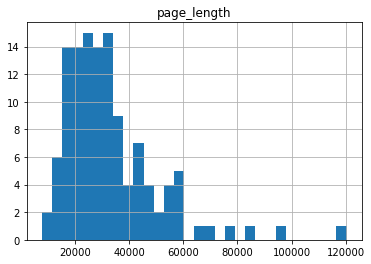

In [6]:
page_length_hist = gene_wiki_vol_info[["page_length"]].hist(bins=30)

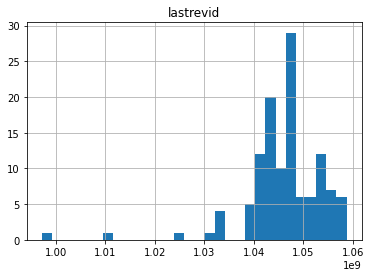

In [7]:
rev_num_hist = gene_wiki_vol_info[["lastrevid"]].hist(bins=30)

In [8]:
filename = "gene_wiki_vol_info-BEFORE.tsv"

In [9]:
gene_wiki_vol_info_before =  pd.read_csv(filename, sep="\t").drop(labels=["Unnamed: 0"], axis=1)

In [10]:
gene_wiki_vol_info_before['title'] = gene_wiki_vol_info_before['title'].str.replace('_',' ')

In [11]:
gene_wiki_vol_info_before.shape

(123, 5)

In [12]:
gene_wiki_vol_info_before.head()

,title,Wikipedia update period,6 months before update,first revision prior to 6 month date,corresponding length
0,Surfactant protein A1,20120830,20120229,462319030,5903
1,Surfactant protein A2,20120830,20120229,204784710,21
2,MiR-155,20130228,20120828,502140831,49959
3,Epoxide hydrolase 2,20130531,20121130,473607874,1330
4,LIG3,20130830,20130228,481575544,1543


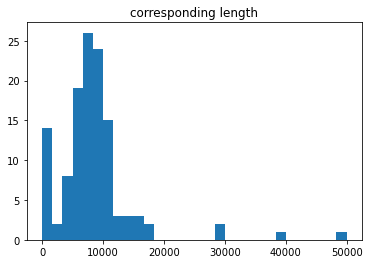

In [13]:
corr_length_hist = gene_wiki_vol_info_before[["corresponding length"]].hist(bins=30, grid=False)

In [14]:
gene_wiki_vol_info_diff = gene_wiki_vol_info[["title","page_length"]].merge(gene_wiki_vol_info_before[["title", "corresponding length"]], how="left", on="title")

In [15]:
gene_wiki_vol_info_diff["change in length"] = gene_wiki_vol_info_diff.apply(
    lambda v: v["page_length"] - v["corresponding length"], axis=1
)

In [16]:
gene_wiki_vol_info_diff.sort_values(by="change in length",ascending=False).tail()

,title,page_length,corresponding length,change in length
85,PAK6,12724,5725,6999
16,ERCC1,45959,39297,6662
54,MTA2,17033,11203,5830
69,HSD17B1,12745,7484,5261
83,PAK3,7740,8519,-779


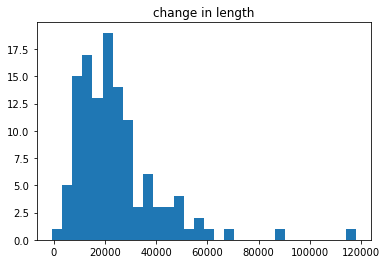

In [20]:
page_diff_hist = gene_wiki_vol_info_diff.hist(column="change in length",bins=30,grid=False)

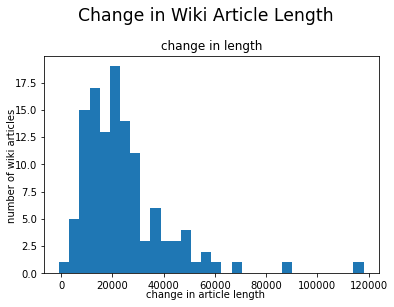

In [17]:
import matplotlib.pyplot as plt

# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
# drop sharex, sharey, layout & add ax=axes
gene_wiki_vol_info_diff.hist(column="change in length",bins=30,grid=False, ax=axes)
# set title and axis labels
plt.suptitle('Change in Wiki Article Length', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'change in article length', ha='center')
fig.text(0.04, 0.5, 'number of wiki articles', va='center', rotation='vertical')
plt.savefig('length_change_histogram.png', dpi=300) #### Note this figure has no labels, nothing
plt.show()

In [21]:
avg_diff = gene_wiki_vol_info_diff["change in length"].median()
max_diff = gene_wiki_vol_info_diff["change in length"].max()
print(avg_diff, max_diff)

20856.0 118033


In [ ]:
gene_wiki_vol_info_diff["percent_change"] = gene_wiki_vol_info_diff.apply(
    lambda v: v["length_diff"] / (v["corresponding length"]+1)*100, axis=1
)

In [ ]:
gene_wiki_vol_info_diff.sort_values(by="percent_change",ascending=False).head()

In [ ]:
page_percent_diff_hist = gene_wiki_vol_info_diff[["percent_change"]].hist(bins=30)

## Page Views Info

In [ ]:
filename = "gw_pvs.tsv"

In [ ]:
gw_pageviews =  pd.read_csv(filename, sep="\t").drop(labels=["Unnamed: 0"], axis=1)

In [ ]:
gw_pageviews.head()

In [ ]:
gw_pageviews.dropna().head()

In [ ]:
gw_pageviews.columns

In [ ]:
from datetime import datetime

In [ ]:
testdate_str = gw_pageviews.columns[1]

In [ ]:
testdate_str

In [ ]:
# format
format = '%Y%m%d00'

In [ ]:
# convert from string format to datetime format
testdate = datetime.strptime(testdate_str, format)

In [ ]:
# get the date from the datetime using date() 
# function
print(testdate.date())

In [ ]:
date_list = []
format = '%Y%m%d00'

avg_pageviews_all = []
avg_pageviews_w_nan = []
avg_pageviews_no_nan_genes = []
gw_pv_summary = pd.DataFrame(columns=["Date", "Average Pageviews (All Pages)"])
gw_pv_summary = pd.DataFrame(columns=["Date", "Average Pageviews (NaN is 0)"])
gw_pv_summary = pd.DataFrame(columns=["Date", "Average Pageviews (No Genes with NaN)"])

In [ ]:
for date in gw_pageviews.columns:
    if (date == 'wikipedia') : continue
    else :
        date_list.append(datetime.strptime(date, format))
        avg_pageviews_all.append(gw_pageviews[[date]].mean(axis=0)[0])
        avg_pageviews_w_nan.append(gw_pageviews[[date]].fillna(0).mean(axis=0, skipna=False)[0])
        avg_pageviews_no_nan_genes.append(gw_pageviews.dropna()[[date]].mean(axis=0)[0])
        

In [ ]:
gw_pv_summary["Date"] = date_list
gw_pv_summary["Average Pageviews (All Pages)"] = avg_pageviews_all
gw_pv_summary["Average Pageviews (NaN is 0)"] = avg_pageviews_w_nan
gw_pv_summary["Average Pageviews (No Genes with NaN)"] = avg_pageviews_no_nan_genes

In [ ]:
gw_pageviews[[date]].mean(axis=0)

In [ ]:
print(date_list[0].date())

In [ ]:
print(avg_pageviews_no_nan_genes)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from matplotlib.pyplot import figure

In [ ]:
figure(figsize=(12, 10), dpi=150)
plt.rcParams['figure.figsize'] = [12, 10]

sns.set(font_scale = 2)

In [ ]:

fig, ax = plt.subplots()
sns.lineplot(data=gw_pv_summary, x='Date', y='Average Pageviews (All Pages)', ax=ax)

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()

In [ ]:
figure(figsize=(12, 10), dpi=150)
plt.rcParams['figure.figsize'] = [12, 10]

sns.set(font_scale = 2)

fig, ax = plt.subplots()
sns.lineplot(data=gw_pv_summary, x='Date', y='Average Pageviews (NaN is 0)', ax=ax)

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()

In [ ]:
figure(figsize=(12, 10), dpi=150)
plt.rcParams['figure.figsize'] = [12, 10]

sns.set(font_scale = 2)

fig, ax = plt.subplots()
sns.lineplot(data=gw_pv_summary, x='Date', y='Average Pageviews (No Genes with NaN)', ax=ax)

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()

In [ ]:
gw_gene_total_pvs = pd.DataFrame(columns=["Gene Name", "Total Pageviews"])

In [ ]:
gw_gene_total_pvs["Gene Name"] = gw_pageviews["wikipedia"]

In [ ]:
gw_gene_total_pvs["Total Pageviews"] = gw_pageviews.drop(["wikipedia"], axis=1).sum(axis=1)

In [ ]:
gw_gene_total_pvs = gw_gene_total_pvs.sort_values(by="Total Pageviews")

In [ ]:
gw_gene_total_pvs.head()

In [ ]:
gw_gene_total_pvs.tail()

In [ ]:
filename = "gene_wiki_views.tsv"

In [ ]:
gw_pageviews_raw = pd.read_csv(filename, sep="\t").drop(labels=["Unnamed: 0"], axis=1)

In [ ]:
gw_pageviews_raw.head()

## WikiData Added Statements

In [ ]:
filename = "wd_statements_added.tsv"

In [ ]:
wd_statements_info = pd.read_csv(filename, sep="\t").drop(labels=["Unnamed: 0"], axis=1)

In [ ]:
wd_statements_info.head()

In [ ]:
#Note: Previously we had more statements, 469 before vs 282 now

wd_statements_info.shape

## Citations

In [ ]:
filename = "article_citations.tsv"

In [ ]:
citations = pd.read_csv(filename, sep="\t").drop(labels=["Unnamed: 0"], axis=1)

In [ ]:
citations.head()

In [ ]:
citations.shape

In [ ]:
citation_hist = citations[["Total Citations from google scholar 2021.12.03"]].hist(bins=30)

In [ ]:
citations.sort_values(by="Total Citations from google scholar 2021.12.03").head()

In [ ]:
citations.sort_values(by="Total Citations from google scholar 2021.12.03").tail()